In [30]:
import time

import pandas as pd
from matplotlib import pyplot as plt
from PyARMViz import *
from apriori_python import apriori
from efficient_apriori import apriori as efficient_apriori
from fpgrowth_py import fpgrowth

In [31]:
df = pd.read_csv('data/BreadBasket_DMS.csv')
transactions = df.groupby('Transaction')['Item'].apply(list).tolist()

In [32]:
n_trans = len(transactions)
times = {}
min_sup = 0.001

apriori

In [33]:
def output_apriori(rules):
    rules_pyarmviz = []
    for i, (antecedent, consequent, confidence) in enumerate(rules):
        ant = frozenset(antecedent)
        cons = frozenset(consequent)
        union = ant | cons

        count_ab = sum(1 for t in transactions if union.issubset(t))
        count_a = sum(1 for t in transactions if ant.issubset(t))
        count_b = sum(1 for t in transactions if cons.issubset(t))

        support_ab = count_ab / n_trans
        support_a = count_a / n_trans
        support_b = count_b / n_trans

        lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

        # Вывод в консоль
        print(f"{i}: {antecedent} -> {consequent}"
              f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

        rules_pyarmviz.append(
            PyARMViz.Rule.Rule(
                lhs=[', '.join(set(antecedent))],
                rhs=[', '.join(set(consequent))],
                count_full=count_ab,
                count_lhs=count_a,
                count_rhs=count_b,
                num_transactions=n_trans
            )
        )

    PyARMViz.metadata_scatter_plot(rules_pyarmviz)
    PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

In [34]:
start = time.time()
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.6)
times['apriori'] = time.time() - start
output_apriori(rules)

0: {'Cake', 'Hot chocolate'} -> {'Coffee'}Support = 0.007 Confidence = 0.602 Lift = 1.267
1: {'Cookies', 'Juice'} -> {'Coffee'}Support = 0.004 Confidence = 0.603 Lift = 1.270
2: {'Bakewell'} -> {'Coffee'}Support = 0.003 Confidence = 0.604 Lift = 1.272
3: {'Granola'} -> {'Coffee'}Support = 0.002 Confidence = 0.607 Lift = 1.278
4: {'Scone', 'Hot chocolate'} -> {'Coffee'}Support = 0.002 Confidence = 0.607 Lift = 1.278
5: {'Cookies', 'Pastry'} -> {'Coffee'}Support = 0.002 Confidence = 0.607 Lift = 1.278
6: {'NONE', 'Brownie'} -> {'Coffee'}Support = 0.001 Confidence = 0.609 Lift = 1.281
7: {'Medialuna', 'Toast'} -> {'Coffee'}Support = 0.001 Confidence = 0.611 Lift = 1.286
8: {'NONE', 'Alfajores'} -> {'Coffee'}Support = 0.001 Confidence = 0.611 Lift = 1.286
9: {'Cookies', 'Hot chocolate'} -> {'Coffee'}Support = 0.004 Confidence = 0.614 Lift = 1.292
10: {'Muffin', 'NONE'} -> {'Coffee'}Support = 0.001 Confidence = 0.619 Lift = 1.303
11: {'NONE', 'Hot chocolate'} -> {'Coffee'}Support = 0.004 Co

In [35]:
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.8)
output_apriori(rules)

0: {'Keeping It Local'} -> {'Coffee'}Support = 0.005 Confidence = 0.810 Lift = 1.704
1: {'Extra Salami or Feta'} -> {'Coffee'}Support = 0.003 Confidence = 0.816 Lift = 1.717
2: {'Salad', 'Sandwich'} -> {'Coffee'}Support = 0.002 Confidence = 0.833 Lift = 1.754
3: {'Vegan mincepie', 'Cake'} -> {'Coffee'}Support = 0.001 Confidence = 0.833 Lift = 1.754
4: {'Scone', 'NONE'} -> {'Coffee'}Support = 0.002 Confidence = 0.833 Lift = 1.754
5: {'Sandwich', 'Hearty & Seasonal'} -> {'Coffee'}Support = 0.001 Confidence = 0.857 Lift = 1.804
6: {'Pastry', 'Toast'} -> {'Coffee'}Support = 0.001 Confidence = 0.867 Lift = 1.824
7: {'Salad', 'Extra Salami or Feta'} -> {'Coffee'}Support = 0.001 Confidence = 0.875 Lift = 1.842
8: {'Medialuna', 'NONE', 'Hot chocolate'} -> {'Coffee'}Support = 0.001 Confidence = 0.909 Lift = 1.914
9: {'Tartine', 'NONE'} -> {'Coffee'}Support = 0.001 Confidence = 0.923 Lift = 1.943


efficient_apriori

In [36]:
def output_efficient_apriori(rules):
    rules_pyarmviz = []

    for i, r in enumerate(rules):
        ant = frozenset(r.lhs)
        cons = frozenset(r.rhs)
        union = ant | cons

        count_ab = sum(1 for t in transactions if union.issubset(t))
        count_a = sum(1 for t in transactions if ant.issubset(t))
        count_b = sum(1 for t in transactions if cons.issubset(t))

        support_ab = count_ab / n_trans
        support_a = count_a / n_trans
        support_b = count_b / n_trans

        lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

        print(f"{i}: {r.lhs} -> {r.rhs} "
              f"Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")

        rules_pyarmviz.append(
            PyARMViz.Rule.Rule(
                lhs=[", ".join(r.lhs)],
                rhs=[", ".join(r.rhs)],
                count_full=count_ab,
                count_lhs=count_a,
                count_rhs=count_b,
                num_transactions=n_trans
            )
        )
    PyARMViz.metadata_scatter_plot(rules_pyarmviz)
    PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)


In [37]:
start = time.time()
itemsets, rules = efficient_apriori(transactions, min_support=min_sup, min_confidence=0.6)
times['efficient-apriori'] = time.time() - start
output_efficient_apriori(rules)

0: ('Art Tray',) -> ('Coffee',) Support = 0.003 Confidence = 0.684 Lift = 1.440
1: ('Bakewell',) -> ('Coffee',) Support = 0.003 Confidence = 0.604 Lift = 1.272
2: ('Extra Salami or Feta',) -> ('Coffee',) Support = 0.003 Confidence = 0.816 Lift = 1.717
3: ('Granola',) -> ('Coffee',) Support = 0.002 Confidence = 0.607 Lift = 1.278
4: ('Keeping It Local',) -> ('Coffee',) Support = 0.005 Confidence = 0.810 Lift = 1.704
5: ('Salad',) -> ('Coffee',) Support = 0.007 Confidence = 0.626 Lift = 1.318
6: ('Tartine',) -> ('Coffee',) Support = 0.003 Confidence = 0.630 Lift = 1.327
7: ('Toast',) -> ('Coffee',) Support = 0.024 Confidence = 0.704 Lift = 1.483
8: ('Alfajores', 'Cookies') -> ('Coffee',) Support = 0.002 Confidence = 0.652 Lift = 1.373
9: ('Alfajores', 'NONE') -> ('Coffee',) Support = 0.001 Confidence = 0.611 Lift = 1.286
10: ('Brownie', 'Cookies') -> ('Coffee',) Support = 0.002 Confidence = 0.625 Lift = 1.316
11: ('Brownie', 'NONE') -> ('Coffee',) Support = 0.001 Confidence = 0.609 Lift 

In [38]:
itemsets, rules = efficient_apriori(transactions, min_support=min_sup, min_confidence=0.8)
n_trans = len(transactions)
output_efficient_apriori(rules)

0: ('Extra Salami or Feta',) -> ('Coffee',) Support = 0.003 Confidence = 0.816 Lift = 1.717
1: ('Keeping It Local',) -> ('Coffee',) Support = 0.005 Confidence = 0.810 Lift = 1.704
2: ('Cake', 'Vegan mincepie') -> ('Coffee',) Support = 0.001 Confidence = 0.833 Lift = 1.754
3: ('Extra Salami or Feta', 'Salad') -> ('Coffee',) Support = 0.001 Confidence = 0.875 Lift = 1.842
4: ('Hearty & Seasonal', 'Sandwich') -> ('Coffee',) Support = 0.001 Confidence = 0.857 Lift = 1.804
5: ('NONE', 'Scone') -> ('Coffee',) Support = 0.002 Confidence = 0.833 Lift = 1.754
6: ('NONE', 'Tartine') -> ('Coffee',) Support = 0.001 Confidence = 0.923 Lift = 1.943
7: ('Pastry', 'Toast') -> ('Coffee',) Support = 0.001 Confidence = 0.867 Lift = 1.824
8: ('Salad', 'Sandwich') -> ('Coffee',) Support = 0.002 Confidence = 0.833 Lift = 1.754
9: ('Hot chocolate', 'Medialuna', 'NONE') -> ('Coffee',) Support = 0.001 Confidence = 0.909 Lift = 1.914


fpgrowth_py

In [39]:
def output_fpgrowth(rules):
    rules_pyarmviz_fp = []

    for i, (antecedent, consequent, confidence) in enumerate(rules):
        ant = frozenset(antecedent)
        cons = frozenset(consequent)
        union = ant | cons

        count_ab = sum(1 for t in transactions if union.issubset(t))
        count_a = sum(1 for t in transactions if ant.issubset(t))
        count_b = sum(1 for t in transactions if cons.issubset(t))

        support_ab = count_ab / n_trans
        support_a = count_a / n_trans
        support_b = count_b / n_trans
        lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

        print(f"{i}: {antecedent} -> {consequent} "
              f"Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

        rules_pyarmviz_fp.append(
            PyARMViz.Rule.Rule(
                lhs=[", ".join(antecedent)],
                rhs=[", ".join(consequent)],
                count_full=count_ab,
                count_lhs=count_a,
                count_rhs=count_b,
                num_transactions=n_trans
            )
        )
    PyARMViz.metadata_scatter_plot(rules_pyarmviz_fp)
    PyARMViz.adjacency_graph_plotly(rules_pyarmviz_fp)
    # PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

In [40]:
start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.6)
times['fpgrowth-py'] = time.time() - start
output_fpgrowth(rules)

0: {'Mighty Protein'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
1: {'Granola'} -> {'Coffee'} Support = 0.002 Confidence = 0.607 Lift = 1.278
2: {'NONE', 'Art Tray'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
3: {'Art Tray'} -> {'Coffee'} Support = 0.003 Confidence = 0.684 Lift = 1.440
4: {'Art Tray'} -> {'Coffee'} Support = 0.003 Confidence = 0.684 Lift = 1.440
5: {'Bread', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.700 Lift = 1.473
6: {'Salad', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
7: {'NONE', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.765 Lift = 1.610
8: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
9: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
10: {'Tartine', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943
11: {'Tartine'} -> {'Coffee'} Suppo

In [41]:
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.8)
output_fpgrowth(rules)

0: {'Mighty Protein'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
1: {'NONE', 'Art Tray'} -> {'Coffee'} Support = 0.001 Confidence = 0.818 Lift = 1.722
2: {'Salad', 'Extra Salami or Feta'} -> {'Coffee'} Support = 0.001 Confidence = 0.875 Lift = 1.842
3: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
4: {'Extra Salami or Feta'} -> {'Coffee'} Support = 0.003 Confidence = 0.816 Lift = 1.717
5: {'Tartine', 'NONE'} -> {'Coffee'} Support = 0.001 Confidence = 0.923 Lift = 1.943
6: {'Vegan mincepie', 'Cake'} -> {'Coffee'} Support = 0.001 Confidence = 0.833 Lift = 1.754
7: {'Keeping It Local'} -> {'Coffee'} Support = 0.005 Confidence = 0.810 Lift = 1.704
8: {'Salad', 'Sandwich'} -> {'Coffee'} Support = 0.002 Confidence = 0.833 Lift = 1.754
9: {'Sandwich', 'Hearty & Seasonal'} -> {'Coffee'} Support = 0.001 Confidence = 0.857 Lift = 1.804
10: {'Pastry', 'Toast'} -> {'Coffee'} Support = 0.001 Confidence = 0.867 Lift = 1.824
11: {'Scone', 'N

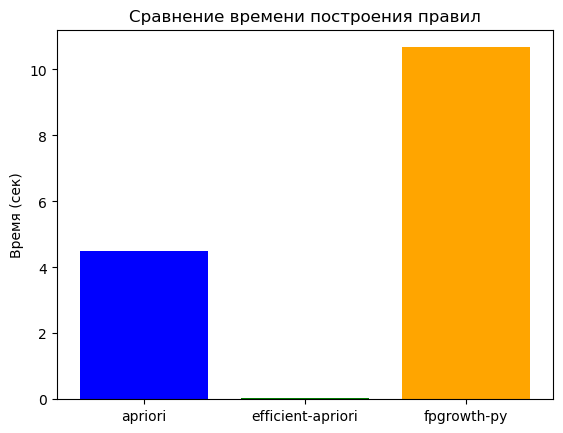

In [42]:
plt.bar(times.keys(), times.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Время (сек)")
plt.title("Сравнение времени построения правил")
plt.show()